# Urea in saline, Cary5000, normalized
Data from Feb. 1, 11, and 22, 2022  
Measured with the Cary5000 in UW Chemistry Student Facility  
Blank to air  
Background is water  
Data has been normalized to the largest absorbance per spectrum

In [1]:
# Import packages

# Pandas library for the pandas dataframes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR

# Set larger fontsize for all plots
plt.rcParams.update({'font.size': 14})

In [3]:
# Import data

data = pd.read_csv('Datasets/urea_in_saline_cary5000.csv')

In [65]:
data

,Urea Concentration (mM),Date Measured,Type,Process,Solvent,2500,2499,2498,2497,2496,...,199,198,197,196,195,194,193,192,191,190
0,0.0,"Feb. 1, 2022",raw,normalized,saline,0.298431,0.301341,0.304291,0.306282,0.308359,...,0.361543,0.366255,0.368864,0.378832,0.378431,0.393099,0.397457,0.383589,0.416702,0.412296
1,0.0,"Feb. 1, 2022",raw,normalized,saline,0.307994,0.310840,0.313797,0.315632,0.317241,...,0.355790,0.360166,0.362703,0.372803,0.372285,0.386894,0.390989,0.377885,0.410304,0.406783
2,0.5,"Feb. 1, 2022",raw,normalized,saline,0.291755,0.300952,0.303801,0.306101,0.307908,...,0.354902,0.359146,0.361506,0.370988,0.370830,0.384763,0.388561,0.375848,0.407207,0.401769
3,0.5,"Feb. 1, 2022",raw,normalized,saline,0.306774,0.309784,0.312549,0.314443,0.316351,...,0.350314,0.354415,0.356987,0.365899,0.365903,0.379756,0.383695,0.371102,0.402973,0.397271
4,2.0,"Feb. 1, 2022",raw,normalized,saline,0.298964,0.302140,0.304847,0.307096,0.308640,...,0.364504,0.367812,0.370143,0.380391,0.380485,0.394986,0.399000,0.385428,0.418334,0.414698
5,2.0,"Feb. 1, 2022",raw,normalized,saline,0.307497,0.310426,0.313009,0.315191,0.316597,...,0.355023,0.358568,0.360716,0.370611,0.370509,0.384603,0.388456,0.375809,0.408066,0.403740
6,5.0,"Feb. 1, 2022",raw,normalized,saline,0.298065,0.301234,0.304046,0.306255,0.307782,...,0.357557,0.360010,0.362341,0.372112,0.371795,0.386025,0.389515,0.376903,0.408608,0.403582
7,5.0,"Feb. 1, 2022",raw,normalized,saline,0.307334,0.310431,0.312971,0.315266,0.316912,...,0.351732,0.354325,0.356437,0.365661,0.365655,0.379323,0.382975,0.370680,0.401890,0.396821
8,8.0,"Feb. 1, 2022",raw,normalized,saline,0.308158,0.311207,0.313723,0.315884,0.317152,...,0.358487,0.360573,0.362755,0.372427,0.372193,0.386862,0.390842,0.377482,0.409925,0.406347
9,8.0,"Feb. 1, 2022",raw,normalized,saline,0.299565,0.302802,0.305466,0.307841,0.309226,...,0.366400,0.368517,0.370969,0.381093,0.380869,0.395695,0.399594,0.385799,0.418890,0.415050


In [64]:
X = abs_data.iloc[:,2294:2297].values
X

array([[0.00672274, 0.01059934, 0.01616385],
       [0.00704444, 0.0106038 , 0.01579774],
       [0.00837255, 0.01219896, 0.01767969],
       [0.00989189, 0.01339634, 0.01837363],
       [0.01083554, 0.01524523, 0.02152408],
       [0.00945782, 0.01350186, 0.01927102],
       [0.01187528, 0.01688842, 0.0238318 ],
       [0.01227732, 0.01672312, 0.02308867],
       [0.01280096, 0.01830787, 0.0261066 ],
       [0.01246109, 0.01842154, 0.0267948 ],
       [0.01797896, 0.02487065, 0.03462324],
       [0.01796561, 0.02471667, 0.03417083],
       [0.01986065, 0.02826164, 0.04000596],
       [0.02065663, 0.02869131, 0.04007639],
       [0.0991701 , 0.10633115, 0.11677323],
       [0.10962168, 0.11824789, 0.13018053],
       [0.09972442, 0.10695899, 0.11689105],
       [0.20958805, 0.25232609, 0.30625464],
       [0.19461028, 0.23404347, 0.28398634],
       [0.18872862, 0.22541464, 0.27199068],
       [0.26271673, 0.31673904, 0.37654934],
       [0.2882589 , 0.3476028 , 0.41247093],
       [0.

## PCA and PLS

#### Specify features (X) and target (y)

In [48]:
X = abs_data.iloc[:, 2294:2297].values
y = abs_data[['Urea Concentration (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

#### Fit principal component analysis (PCA) and partial least squares (PLS) regression models to the POUR data

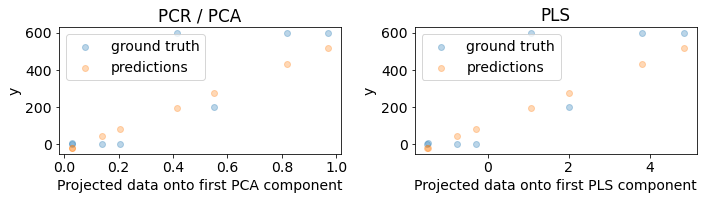

PCR r-squared 0.655
PLS r-squared 0.655


In [49]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

## Simple Dense NN

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import tqdm
from tqdm.keras import TqdmCallback

### Make dataset smaller

In [50]:
X = abs_data.iloc[:, 2303:2307].values
y = abs_data[['Urea Concentration (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

In [54]:
def simple_network():
    # assemble the structure
    model = Sequential()
    # Note - THIS IS YOUR FIRST HIDDEN LAYER - input layer is defined by input_dim!
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    # This is the output layer
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

my_model = simple_network()
my_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Initialize a seed for random generation
seed = 4

In [56]:
# initialize the random number generator - i.e. get reproducible starting weights
np.random.seed(seed)
# create the NN framework
estimator = KerasRegressor(build_fn=simple_network,
        epochs=150, batch_size=10000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=150, 
        batch_size=10000, verbose=0, callbacks=TqdmCallback(verbose=0))

ValueError: in user code:

    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/j19a9k3/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_10 is incompatible with the layer: expected axis -1 of input shape to have value 6 but received input with shape [None, 4]
